In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('C:\\Users\\Nelson\\Downloads\\Telegram Desktop\\dataR.csv')
training_set = dataset_train.iloc[:730, 1:2].values

In [2]:
dataset_train

,DATE,MNO W,MNO X,MNO Y,MNO Z,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1/1/2018,99.070,99.23,97.85,98.47,NaN,NaN,NaN
1,1/2/2018,99.500,99.16,97.45,97.98,NaN,NaN,NaN
2,1/3/2018,99.190,99.21,98.98,99.02,NaN,NaN,NaN
3,1/4/2018,98.770,99.15,97.32,98.32,NaN,NaN,NaN
4,1/5/2018,99.421,98.84,99.08,98.56,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset_train.isnull().sum()

DATE            85
MNO W           85
MNO X           85
MNO Y           85
MNO Z           85
Unnamed: 5    1084
Unnamed: 6    1085
Unnamed: 7    1083
dtype: int64

In [4]:
training_set

array([[99.07 ],
       [99.5  ],
       [99.19 ],
       [98.77 ],
       [99.421],
       [97.468],
       [99.339],
       [97.303],
       [99.227],
       [99.046],
       [97.861],
       [98.97 ],
       [97.685],
       [98.344],
       [95.198],
       [96.922],
       [95.545],
       [97.662],
       [98.34 ],
       [97.56 ],
       [98.78 ],
       [98.88 ],
       [96.67 ],
       [97.56 ],
       [98.76 ],
       [99.531],
       [99.612],
       [99.542],
       [99.013],
       [98.186],
       [98.394],
       [98.394],
       [99.126],
       [98.167],
       [98.419],
       [96.025],
       [98.896],
       [95.962],
       [98.283],
       [98.715],
       [98.453],
       [98.29 ],
       [97.887],
       [98.653],
       [97.868],
       [99.329],
       [97.818],
       [98.728],
       [97.295],
       [99.039],
       [99.033],
       [99.149],
       [98.636],
       [98.724],
       [98.94 ],
       [98.931],
       [99.783],
       [98.501],
       [98.599

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
training_set_scaled

array([[0.93602645],
       [0.96693502],
       [0.9446521 ],
       [0.91446233],
       [0.96125647],
       [0.82087407],
       [0.95536228],
       [0.8090138 ],
       [0.94731167],
       [0.93430132],
       [0.84912306],
       [0.92883841],
       [0.83647211],
       [0.88384129],
       [0.65770558],
       [0.78162737],
       [0.68264807],
       [0.83481886],
       [0.88355377],
       [0.82748706],
       [0.91518114],
       [0.92236918],
       [0.76351351],
       [0.82748706],
       [0.91374353],
       [0.96916331],
       [0.97498562],
       [0.969954  ],
       [0.93192927],
       [0.87248419],
       [0.88743531],
       [0.88743531],
       [0.94005175],
       [0.87111846],
       [0.88923232],
       [0.71715066],
       [0.92351926],
       [0.7126222 ],
       [0.87945658],
       [0.91050891],
       [0.89167625],
       [0.87995975],
       [0.85099195],
       [0.90605233],
       [0.84962622],
       [0.95464347],
       [0.8460322 ],
       [0.911

In [7]:
 len(X_train)

670

In [8]:
 len(y_train)

670

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train

array([[0.93602645, 0.96693502, 0.9446521 , ..., 0.89512651, 0.90217079,
        0.91223404],
       [0.96693502, 0.9446521 , 0.91446233, ..., 0.90217079, 0.91223404,
        0.87442496],
       [0.9446521 , 0.91446233, 0.96125647, ..., 0.91223404, 0.87442496,
        0.73224554],
       ...,
       [0.90583669, 0.93674526, 0.97771708, ..., 0.93530765, 0.93962047,
        0.9072743 ],
       [0.93674526, 0.97771708, 0.94608971, ..., 0.93962047, 0.9072743 ,
        0.92955722],
       [0.97771708, 0.94608971, 0.89146061, ..., 0.9072743 , 0.92955722,
        0.93962047]])

In [11]:
X_train.shape[1]

60

In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train

array([[[0.93602645],
        [0.96693502],
        [0.9446521 ],
        ...,
        [0.89512651],
        [0.90217079],
        [0.91223404]],

       [[0.96693502],
        [0.9446521 ],
        [0.91446233],
        ...,
        [0.90217079],
        [0.91223404],
        [0.87442496]],

       [[0.9446521 ],
        [0.91446233],
        [0.96125647],
        ...,
        [0.91223404],
        [0.87442496],
        [0.73224554]],

       ...,

       [[0.90583669],
        [0.93674526],
        [0.97771708],
        ...,
        [0.93530765],
        [0.93962047],
        [0.9072743 ]],

       [[0.93674526],
        [0.97771708],
        [0.94608971],
        ...,
        [0.93962047],
        [0.9072743 ],
        [0.92955722]],

       [[0.97771708],
        [0.94608971],
        [0.89146061],
        ...,
        [0.9072743 ],
        [0.92955722],
        [0.93962047]]])

In [14]:
X_train.shape[1]

60

In [39]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
11/11 [==============================] - 382s 35s/step - loss: 0.4309
Epoch 2/10
11/11 [==============================] - 265s 24s/step - loss: 0.1418
Epoch 3/10
11/11 [==============================] - 197s 18s/step - loss: 0.1176
Epoch 4/10
11/11 [==============================] - 142s 13s/step - loss: 0.1042
Epoch 5/10
11/11 [==============================] - 355s 32s/step - loss: 0.0984
Epoch 6/10
11/11 [==============================] - 354s 32s/step - loss: 0.0975
Epoch 7/10
11/11 [==============================] - 268s 24s/step - loss: 0.0910
Epoch 8/10
11/11 [==============================] - 243s 22s/step - loss: 0.0912
Epoch 9/10
11/11 [==============================] - 76s 7s/step - loss: 0.0889
Epoch 10/10
11/11 [==============================] - ETA: 0s - loss: 0.0922 - 330s 30s/step - loss: 0.0922


In [71]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('C:\\Users\\Nelson\\Downloads\\Telegram Desktop\\dataR.csv')
valid_real = dataset_test.iloc[730:915, 1:2].values
test_real = dataset_test.iloc[915:1000, 1:2].values



In [73]:
valid_real

array([[99.21],
       [99.48],
       [99.01],
       [98.34],
       [99.02],
       [98.98],
       [99.21],
       [98.68],
       [99.12],
       [99.21],
       [98.08],
       [99.08],
       [98.87],
       [97.88],
       [98.76],
       [97.76],
       [97.58],
       [98.98],
       [98.76],
       [98.67],
       [99.08],
       [98.87],
       [98.54],
       [97.65],
       [98.65],
       [99.08],
       [99.24],
       [99.43],
       [98.87],
       [98.  ],
       [98.54],
       [99.34],
       [99.21],
       [98.98],
       [97.78],
       [98.56],
       [98.67],
       [98.67],
       [98.23],
       [99.22],
       [99.12],
       [98.98],
       [99.09],
       [98.67],
       [95.56],
       [94.59],
       [96.24],
       [93.41],
       [94.42],
       [96.11],
       [93.6 ],
       [95.21],
       [94.88],
       [98.98],
       [97.98],
       [98.21],
       [99.23],
       [99.21],
       [98.65],
       [97.76],
       [96.78],
       [98.67],
       [

In [42]:
df_train = dataset_train["MNO W"].dropna()[:730]
df_train

0      99.070
1      99.500
2      99.190
3      98.770
4      99.421
        ...  
725    99.120
726    98.670
727    98.980
728    99.120
729    99.140
Name: MNO W, Length: 730, dtype: float64

In [59]:
df_valid = dataset_test["MNO W"].dropna()[730:915]
df_valid

730    99.21
731    99.48
732    99.01
733    98.34
734    99.02
       ...  
910    99.38
911    95.94
912    99.06
913    97.80
914    98.73
Name: MNO W, Length: 185, dtype: float64

In [60]:
df_test = dataset_test["MNO W"].dropna()[915:1000]
df_test

915    98.55
916    98.61
917    99.34
918    98.22
919    99.17
       ...  
995    99.25
996    97.46
997    97.70
998    98.65
999    97.98
Name: MNO W, Length: 85, dtype: float64

In [74]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train,df_valid, df_test), axis = 0)
valid = dataset_total[len(dataset_total) - len(df_valid) - 60:].values
valid = valid.reshape(-1,1)
valid = sc.transform(valid)

X_valid = []
for i in range(60, 245):
    X_valid.append(valid[i-60:i, 0])
X_valid = np.array(X_valid)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
predicted_traffic_valid = regressor.predict(X_valid)
predicted_traffic_valid = sc.inverse_transform(predicted_traffic_valid)



In [75]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train,df_valid, df_test), axis = 0)
test = dataset_total[len(dataset_total) - len(df_test) - 60:].values
test = test.reshape(-1,1)
test = sc.transform(test)

X_test = []
for i in range(60, 145):
    X_test.append(test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_traffic_test = regressor.predict(X_test)
predicted_traffic_test = sc.inverse_transform(predicted_traffic_test)

In [76]:
len(predicted_traffic_test)

85

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_error(valid_real, predicted_traffic_valid))
print(mean_absolute_percentage_error(valid_real, predicted_traffic_valid))

1.240878912848396
0.0128258607893753


In [79]:
# MNO W Test Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_error(test_real, predicted_traffic_test))
print(mean_absolute_percentage_error(test_real, predicted_traffic_test))

2.8396580523322617
0.0322396025138714


In [46]:
len(X_test)

270

In [47]:
len(inputs)

330

In [48]:
real_traffic_volume

array([[99.21],
       [99.48],
       [99.01],
       [98.34],
       [99.02],
       [98.98],
       [99.21],
       [98.68],
       [99.12],
       [99.21],
       [98.08],
       [99.08],
       [98.87],
       [97.88],
       [98.76],
       [97.76],
       [97.58],
       [98.98],
       [98.76],
       [98.67],
       [99.08],
       [98.87],
       [98.54],
       [97.65],
       [98.65],
       [99.08],
       [99.24],
       [99.43],
       [98.87],
       [98.  ],
       [98.54],
       [99.34],
       [99.21],
       [98.98],
       [97.78],
       [98.56],
       [98.67],
       [98.67],
       [98.23],
       [99.22],
       [99.12],
       [98.98],
       [99.09],
       [98.67],
       [95.56],
       [94.59],
       [96.24],
       [93.41],
       [94.42],
       [96.11],
       [93.6 ],
       [95.21],
       [94.88],
       [98.98],
       [97.98],
       [98.21],
       [99.23],
       [99.21],
       [98.65],
       [97.76],
       [96.78],
       [98.67],
       [

In [49]:
predicted_traffic_volume

array([[98.541435],
       [98.54611 ],
       [98.55095 ],
       [98.55593 ],
       [98.560555],
       [98.56461 ],
       [98.56797 ],
       [98.57076 ],
       [98.57285 ],
       [98.57437 ],
       [98.57554 ],
       [98.575935],
       [98.57558 ],
       [98.574524],
       [98.57229 ],
       [98.568825],
       [98.56366 ],
       [98.55625 ],
       [98.546974],
       [98.5364  ],
       [98.52519 ],
       [98.51419 ],
       [98.50402 ],
       [98.49497 ],
       [98.486534],
       [98.478584],
       [98.4714  ],
       [98.465454],
       [98.46134 ],
       [98.4592  ],
       [98.45844 ],
       [98.45853 ],
       [98.45949 ],
       [98.461426],
       [98.46435 ],
       [98.467476],
       [98.47031 ],
       [98.47255 ],
       [98.474106],
       [98.47471 ],
       [98.47471 ],
       [98.47459 ],
       [98.47472 ],
       [98.475464],
       [98.476814],
       [98.476746],
       [98.472244],
       [98.461365],
       [98.44139 ],
       [98.410614],


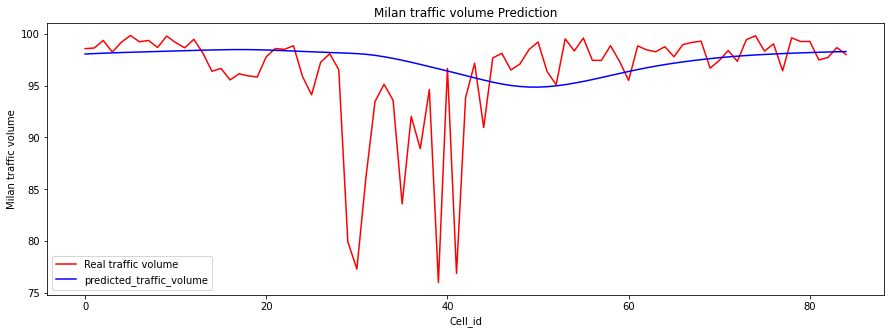

In [80]:
# Visualising the results
plt.figure(figsize = (15, 5) )
plt.plot(test_real, color = 'red', label = 'Real traffic volume')
plt.plot( predicted_traffic_test, color = 'blue', label = 'predicted_traffic_volume')
plt.title('Milan traffic volume Prediction')
plt.xlabel('Cell_id')
plt.ylabel('Milan traffic volume')
plt.legend()
plt.show()

In [86]:
predicted_traffic_test = pd.DataFrame(predicted_traffic_test)
test_real = pd.DataFrame(test_real)

In [87]:
test_real

,0
0,98.55
1,98.61
2,99.34
3,98.22
4,99.17
...,...
80,99.25
81,97.46
82,97.70
83,98.65


In [89]:
mnow = pd.concat((predicted_traffic_test,test_real),axis=1)

In [100]:
mnow["real_mnow"] = mnow.iloc[:,0]
mnow["predicted_mnow"] = mnow.iloc[:,1]

In [104]:
mnow.drop(0,axis=1,inplace=True)

In [105]:
mnow

,real_mnow,predicted_mnow
0,98.033379,98.55
1,98.073906,98.61
2,98.110062,99.34
3,98.142845,98.22
4,98.172623,99.17
...,...,...
80,98.172813,99.25
81,98.200500,97.46
82,98.225945,97.70
83,98.248550,98.65


In [106]:
mnow.to_csv("predicted_MNO W.csv")